In [2]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 13.8 MB/s eta 0:00:0000:0100:01


In [3]:
!pip install pynsee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 23.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 12.0 MB/s eta 0:00:00


In [4]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 68.0 MB/s eta 0:00:00
  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-vg75qwmh
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-vg75qwmh
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2617948a5

# Récupération et traitement des données

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import pynsee as yns
import requests
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from cartiflette.s3 import download_vectorfile_url_all
from pathlib import Path

/home/cathu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
Path.cwd()

PosixPath('/home/onyxia/work/Projet_Catherine_Christelle')

## Les aménagements cyclables en Ile de France

In [8]:
a_velo= gpd.read_file('amenagements-velo-en-ile-de-france.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [9]:
# Nombre d'entrées
a_velo.shape[0]

112217

In [10]:
a_velo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
a_velo['longueur'].describe()

count    112217.000000
mean        126.315959
std         174.519817
min           0.000000
25%          24.000000
50%          70.000000
75%         161.000000
max        3984.000000
Name: longueur, dtype: float64

In [12]:
a_velo.sample(n=1)

,osm_id,nom_com,sens_voit,ag,panneaux,moyenn_ech,revetement,highway,insee_com,nom_voie,longueur,petite_ech,nv,ad,geometry
79696,35584362.0,Chatou,DOUBLE,NaN,NaN,31,asphalt,secondary,78146,Quai de l'Amiral Mouchez,164,3,z30,NaN,"LINESTRING (2.16029 48.88872, 2.16039 48.88890..."


Pour le moment, nous travaillons sans les données de géolocalisation qui ne sont pas nécessaires aux calculs. Nous créons pour cela une nouvelle dataframe

In [13]:
col_to_keep = ["nom_com", "sens_voit", "ag", "panneaux", "revetement", "highway", "insee_com", "longueur", "nv", "ad"] 

In [14]:
# df_a_velo = a_velo[col_to_keep].copy()

df_a_velo = a_velo

print(df_a_velo.head())

         osm_id            nom_com sens_voit                              ag  \
0  4.014620e+08            Chelles    DOUBLE                             NaN   
1  4.048666e+08   La Queue-en-Brie        NC  chemin service site propre uni   
2  1.154304e+09            Lésigny        NC                  voie verte uni   
3  3.300503e+08  Pontault-Combault    UNIQUE                       DSC bande   
4  1.104033e+09   Champs-sur-Marne    UNIQUE                             NaN   

  panneaux moyenn_ech revetement      highway insee_com  \
0      NaN         32        NaN      service     77108   
1      NaN         11        NaN        track     94060   
2      NaN         11    asphalt         path     77249   
3      NaN         22        NaN  residential     77373   
4      NaN         22    asphalt  residential     77083   

                     nom_voie  longueur petite_ech           nv  \
0  Rue de la Mare Longue Noue        24          3    limite 30   
1             Allée Jacquette 

### Toutes les pistes ne se valent pas : création de variables d'étude pour les aménagements cyclables

Nous souhaitons étudier la répartition géograhique des aménagements cyclables et particulièrement leur densité en mètre par habitants. Toutefois, l'ensemble des pistes cyclables n'est pas de la même "qualité" : séparée de la route ou non, sens inverse de la circulation, type de revêtement, etc. Pour prendre en compte la qualité des aménagements cyclables, nous pouvons donner des coefficients aux mètres de pistes selon ces différents critères lors du calcul du nombre total de mètres aménagés par commune. Nous allons proposer plusieurs méthodes de calcul selon ces critères.

In [15]:
print(df_a_velo["sens_voit"].unique())
print(df_a_velo["ag"].unique())
print(df_a_velo["revetement"].unique())
print(df_a_velo["highway"].unique())
print(df_a_velo["nv"].unique())
print(df_a_velo["ad"].unique())

['DOUBLE' 'NC' 'UNIQUE']
[nan 'chemin service site propre uni' 'voie verte uni' 'DSC bande'
 'autre chemin velo uni' 'piste uni' 'DSC' 'piste trottoir uni'
 'bande uni' 'cheminement trottoir uni' 'goulotte' 'chemin dedie uni'
 'chaucidou' 'cheminement uni' 'DSC piste' 'voie bus uni' 'piste bi'
 'bande bi' 'shoulder uni']
[nan 'asphalt' 'compacted' 'concrete' 'unpaved' 'wood' 'paving_stones'
 'ground' 'sett' 'gravel' 'sand' 'paved' 'fine_gravel' 'dirt'
 'cobblestone' 'concrete:plates' 'concrete:lanes' 'grass'
 'cobblestone:flattened' 'metal' 'pebblestone' 'unhewn_cobblestone'
 'bricks' 'tartan' 'pavés' 'vegecol' 'artificial_turf' 'grass_paver'
 'earth' 'bitume' 'à_définir' 'rock']
['service' 'track' 'path' 'residential' 'footway' 'cycleway' 'secondary'
 'tertiary' 'living_street' 'unclassified' 'pedestrian' 'steps' 'primary'
 'primary_link' 'secondary_link' 'tertiary_link' 'trunk_link'
 'motorway_link']
['limite 30' 'hors voirie' nan 'z20' 'rue pietonne' 'z30' 'escalier velo'
 'velorue'

In [12]:
df_a_velo['sens_voit'].isna().sum()

0

In [13]:
df_a_velo['ag'].isna().sum()

68312

In [14]:
df_a_velo['revetement'].isna().sum()

38711

In [15]:
df_a_velo['highway'].isna().sum()

0

In [79]:
df_a_velo['nv'].isna().sum()

0

In [17]:
df_a_velo['ad'].isna().sum()

68522

In [18]:
print(df_a_velo['highway'].value_counts().get('unclassified', 0))

4025


In [19]:
df_a_velo['adg'] = df_a_velo.apply(lambda row: row['ad'] if pd.notna(row['ad']) else (row['ag'] if pd.notna(row['ag']) else 'unclassified'), axis=1)

In [20]:
print(df_a_velo['adg'].value_counts().get('unclassified', 0))

55496


Seul le critère suivant ne présente pas trop de valeurs manquantes (nommées 'unclassified' dans la base) :  type de route ("highway", cf [documentation OpenstreeMap](https://wiki.openstreetmap.org/wiki/Key:highway) ). Les autres variables ont soit trop de valeurs manquantes soit manquent d'intérêt seule (sens des voitures). Cependant, "highway" est une colonne générale de catégorisation pour les données d'OpenStreetMap et manque de spécificité pour l'étude des pistes cyclables. Nous allons donc proposer deux méthodes de pondération (en plus d'une variable non pondérée) : une avec "highway", une avec "adg" (['nature de la voie'](https://opendata.stif.info/api/datasets/1.0/amenagements-velo-en-ile-de-france/attachments/metadonnees_amenagements_velo_en_ile_de_france_pdf/)), en proposant de normer les chemins dont nous n'avons pas connaissance de la qualité. Le nombre de valeurs manquantes est cependant très important, malgré notre tentative de réduire son ampleur en sommant ad et ag (ce sont les types de voies à gauche et à droite). Roulant à droite, nous avons donner la priorité à voie à droite.

Nous allons produire 3 variables : deux pondérées censées prendre en compte la qualité de la route, et une autre sans pondération, pour la longueur d'aménagements cyclables par ville. Pour prendre en compte la qualité nous trions les types de routes en leur affectant des poids selon leurs caractéristiques : bande le long d'une route ou séparation, chemin avec ou sans voiture, avec ou sans piéton, etc. Pour cela, la variable "adg" nous semble plus adaptée car plus précise, mais elle a le défaut de présenter énormément valeurs manquantes. Lorsque la valeur est manquante nous assignons un poids neutre (1). La comparaison des résultats avec les 2 méthodes de pondération ou la méthode sans pondération pourra aussi nous renseigner sur la qualité de notre catégorisation.

In [21]:
print(df_a_velo["adg"].unique())

['unclassified' 'chemin service site propre uni' 'voie verte uni'
 'DSC bande' 'bande uni' 'autre chemin velo uni' 'piste uni' 'DSC'
 'piste trottoir uni' 'cheminement trottoir uni' 'goulotte'
 'chemin dedie uni' 'chaucidou' 'cheminement uni' 'voie bus uni'
 'DSC piste' 'piste bi' 'bande bi' 'shoulder uni']


In [22]:
highway_quality_mapping = {
    'service': 1,
    'track': 1,
    'path': 1,
    'trunk_link': 1,
    'motorway_link': 1,
    'residential': 2,
    'footway': 2,
    'cycleway': 2,
    'primary': 2,    
    'primary_link': 2,
    'unclassified': 2,
    'secondary': 3,
    'tertiary': 3,
    'secondary_link': 3,
    'tertiary_link': 3,
    'living_street': 3,
    'pedestrian': 4,
    'steps': 4
}


adg_quality_mapping = {
    'chemin service site propre uni': 1,
    'chemin dedie uni': 1,
    'voie verte uni': 1,
    'autre chemin velo uni': 1,
    'piste bi' : 1,
    'piste uni': 1,
    'bande uni': 2,
    'bande bi' : 2,
    'unclassified': 2,
    'cheminement trottoir uni' : 3,
    'piste trottoir uni': 3,
    'chaucidou': 3,
    'cheminement uni': 3,
    'shoulder uni' : 3,
    'voie bus uni': 4,
    'goulotte': 4,
    'DSC': 4,
    'DSC bande' : 4,
    'DSC piste' : 4
}

In [23]:
df_a_velo['qual_hw'] = df_a_velo['highway'].map(highway_quality_mapping)

df_a_velo['qual_adg'] = df_a_velo['adg'].map(adg_quality_mapping)

In [24]:
quality_weights = {
    1: 1.25,
    2: 1.,
    3: 0.75,
    4: 0.5
}

In [26]:
# Nouvelle colonne pour la longueur pondérée highway

df_a_velo['longueur_pond_hw'] = df_a_velo['longueur'] * df_a_velo['qual_hw'].map(quality_weights)

# Nouvelle colonne pour la longueur pondérée nature voie

df_a_velo['longueur_pond_adg'] = df_a_velo['longueur'] * df_a_velo['qual_adg'].map(quality_weights)

In [27]:
total_longueur_pond_hw = df_a_velo['longueur_pond_hw'].sum()
print(total_longueur_pond_hw) #longueur totale de l'échantillon avec majoration pondérée

14028145.5


In [28]:
total_longueur_pond_nv = df_a_velo['longueur_pond_adg'].sum()
print(total_longueur_pond_nv) #longueur totale de l'échantillon avec majoration pondérée

14382204.5


In [29]:
total_longueur = df_a_velo['longueur'].sum()
print(total_longueur)

14174798


In [32]:
total_longueur_commune = df_a_velo.groupby(['nom_com', 'insee_com'])['longueur'].sum().reset_index()

In [33]:
total_longueur_pond_hw_commune = df_a_velo.groupby(['nom_com', 'insee_com'])['longueur_pond_hw'].sum().reset_index()

In [34]:
total_longueur_pond_adg_commune = df_a_velo.groupby(['nom_com', 'insee_com'])['longueur_pond_adg'].sum().reset_index()

In [35]:
df_amenagements = pd.merge(total_longueur_commune, total_longueur_pond_hw_commune, on=['nom_com', 'insee_com'], suffixes=('_non_pond', '_pond_hw'))

In [36]:
df_amenagements = pd.merge(df_amenagements, total_longueur_pond_adg_commune, on=['nom_com', 'insee_com'], suffixes=(None, '_pond_adg'))

In [37]:
df_amenagements.sample(10)

,nom_com,insee_com,longueur,longueur_pond_hw,longueur_pond_adg
777,Saint-Germain-sur-Morin,77413,5562,5684.50,5686.75
246,Coulommiers,77131,3609,3819.25,4222.00
448,Le Chesnay,78158,19336,18326.00,20765.00
894,Valmondois,95628,23172,25676.50,24174.50
965,Vimpelles,77524,413,516.25,516.25
118,Bougival,78092,15564,15930.25,14374.75
940,Villeneuve-Saint-Georges,94078,27170,26911.50,31875.75
976,Vélizy-Villacoublay,78640,35853,37822.50,39791.50
708,Ponthévrard,78499,1220,1228.25,1406.00
321,Fresnes,94034,17991,17469.00,19095.25


In [38]:
df_amenagements['difference_hw'] = df_amenagements['longueur_pond_hw'] - df_amenagements['longueur']
df_amenagements['difference_adg'] = df_amenagements['longueur_pond_adg'] - df_amenagements['longueur']

Nous avons créé nos trois indicateurs par commune : longueur et longueur pondérée (adg et hw) par commune, mais nous avons perdu de l'information dans cette opération puisque nous perdons de ce fait les coordonnées exactes des aménagements. Cependant, pour l'étude de la densité, cela pourra aussi s'avérer utile. Surtout nous avons besoin de ces indicateurs pour le travail économétrique que nous souhaitons mener, où nous considérons alors les communes comme des individus, et la longueur des pistes cyclables comme nous variable d'intérêt. Cependant, avant de passer à la modélisation économétrique pour tenter d'expliquer le développement des aménagements dans les différentes communes, nous souhaitons représenter et analyser spatialement la répartition des aménagements, leur densité (par habitant), leur densité (par kilomètre) et notamment compléter ces analyses grâce à la disponibilité des données du Vélib.

#### Analyse 

In [58]:
df_amenagements.describe()

,longueur,longueur_pond_hw,longueur_pond_adg,difference_hw,difference_adg
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,14104.276617,13958.353731,14310.651244,-145.922886,206.374627
std,24139.660522,23629.009724,23513.063958,1425.025097,2915.169853
min,2.000000,2.500000,2.500000,-12902.000000,-22854.000000
25%,1476.000000,1466.250000,1643.250000,-273.500000,0.000000
50%,5293.000000,5337.000000,5725.000000,-8.750000,155.000000
75%,15626.000000,15930.250000,16379.250000,165.500000,870.500000
max,228240.000000,226273.250000,231651.000000,15562.250000,20850.500000


En Île-de-France, plus de 78 % des communes sont équipées d'aménagements cyclables. Cependant, la qualité de ces aménagements varie considérablement d'une commune à l'autre et est généralement jugée comme peu satisfaisante. Ces infrastructures s'étendent sur une longueur totale de 14 174 798 mètres, avec une moyenne de 14 104 mètres par commune. La répartition de ces aménagements est inégale parmi les 1005 communes concernées, avec des valeeurs fluctuant entre 2 et 228 240 mètres.

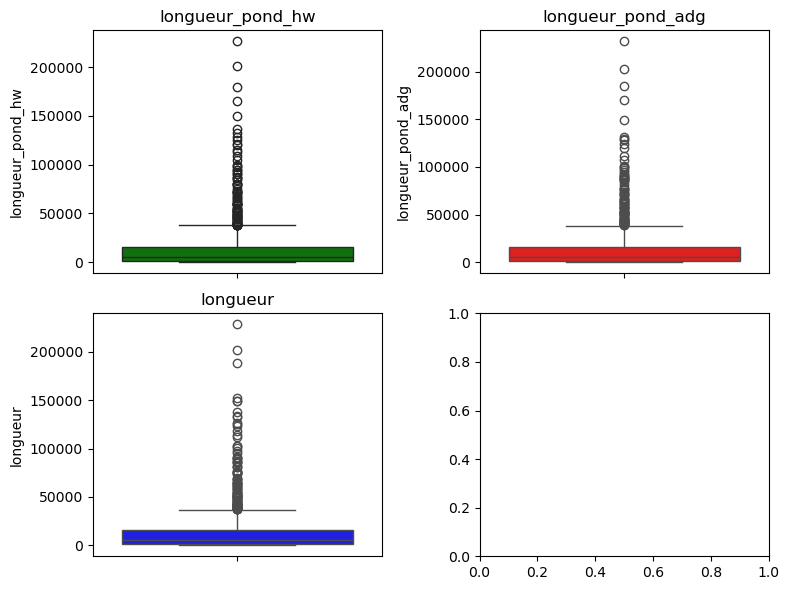

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
sns.boxplot(y='longueur_pond_hw', data=df_amenagements, ax=axes[0, 0],color='g')
axes[0, 0].set_title('longueur_pond_hw')
sns.boxplot(y='longueur_pond_adg', data=df_amenagements, ax=axes[0, 1],color='r')
axes[0, 1].set_title('longueur_pond_adg')
sns.boxplot(y='longueur', data=df_amenagements, ax=axes[1, 0],color='b')
axes[1, 0].set_title('longueur')
plt.tight_layout()
plt.show()

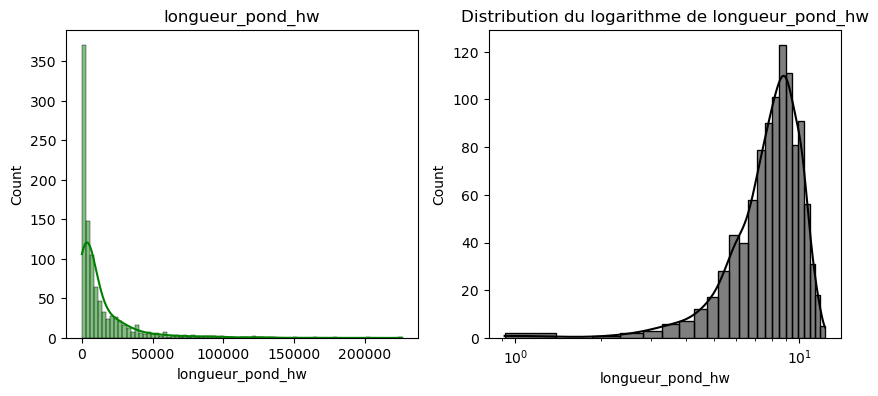

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(x= 'longueur_pond_hw', data=df_amenagements, color='g', kde=True, ax=axes[0])
axes[0].set_title('longueur_pond_hw')

log_lph = np.log(df_amenagements['longueur_pond_hw'])
sns.histplot(log_lph, color='black', kde=True, ax=axes[1])
axes[1].set_title('Distribution du logarithme de longueur_pond_hw')
axes[1].set_xscale('log');

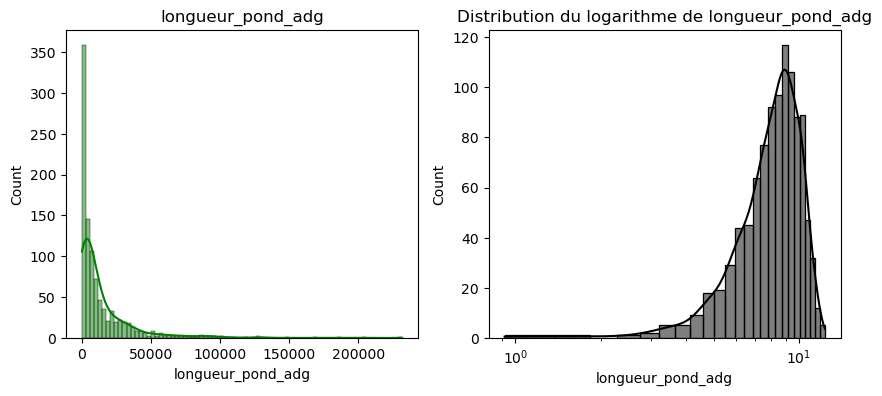

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(x= 'longueur_pond_adg', data=df_amenagements, color='g', kde=True, ax=axes[0])
axes[0].set_title('longueur_pond_adg')

log_lph = np.log(df_amenagements['longueur_pond_adg'])
sns.histplot(log_lph, color='black', kde=True, ax=axes[1])
axes[1].set_title('Distribution du logarithme de longueur_pond_adg')
axes[1].set_xscale('log');

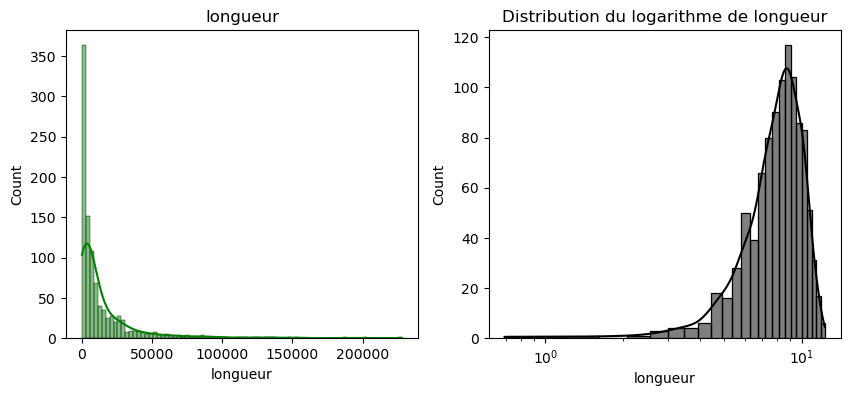

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(x= 'longueur', data=df_amenagements, color='g', kde=True, ax=axes[0])
axes[0].set_title('longueur')

log_lph = np.log(df_amenagements['longueur'])
sns.histplot(log_lph, color='black', kde=True, ax=axes[1])
axes[1].set_title('Distribution du logarithme de longueur')
axes[1].set_xscale('log');

De l'analyse des figures ci-dessus, il ressort que :

    - Les Boxplot et les courbes de distribution des longueurs et longueurs pondérées (étirée vers la droite) reflètent la présence de valeur abérrantes.  
    - Les courbes de la log_distribution des longueurs et longueurs pondérées ont une allure quasiment similaire a celles des distributions normales de mêmes caractéristiques et semblent plus appropriées pour la modélisation.

## Données et ressources nécessaires pour l'étude spatiale

In [60]:
communes = download_vectorfile_url_all(
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    values = ["75","77","78","91", "92", "93", "94","95"],
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 33.9MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.57MiB [00:00, 21.6MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 581kiB [00:00, 10.5MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 483kiB [00:00, 24.0MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 45.5MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 120kiB [00:00, 8.50MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 49.6MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 372kiB [00:00, 65.4MiB/s]


Un préalable au calcul des surfaces est le choix du système de projection adéquat. Dans notre cas , il s'agit de convertir les données au système de projection Lambert 93 qui est le plus approprié.

In [61]:
communes['surface'] = communes.to_crs(2154).area

In [62]:
communes.sort_values('surface', ascending = False)

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry,surface
111,COMMUNE_0000000009739723,NaN,Fontainebleau,FONTAINEBLEAU,77186,Sous-préfecture,15696,07,4,77,11,200072346,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77186,"POLYGON ((2.74740 48.48329, 2.74783 48.48327, ...",1.722864e+08
148,COMMUNE_0000002200276627,NaN,Saint-Germain-en-Laye,SAINT-GERMAIN-EN-LAYE,78551,Sous-préfecture,44806,16,3,78,11,200058519,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78551,"POLYGON ((2.07077 48.94649, 2.07138 48.94676, ...",5.313401e+07
135,COMMUNE_0000002200276622,NaN,Chenoise-Cucharmoy,CHENOISE-CUCHARMOY,77109,Commune simple,1640,18,3,77,11,200037133,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77109,"POLYGON ((3.13963 48.59977, 3.13951 48.59983, ...",4.874811e+07
229,COMMUNE_0000000009738401,NaN,Sonchamp,SONCHAMP,78601,Commune simple,1600,14,2,78,11,200073344,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78601,"POLYGON ((1.83232 48.56349, 1.83260 48.56506, ...",4.634931e+07
152,COMMUNE_0000000009739738,NaN,Étampes,ETAMPES,91223,Sous-préfecture,25629,08,1,91,11,200017846,IGN:EXPRESS-COG-CARTO-TERRITOIRE,91223,"POLYGON ((2.23350 48.39672, 2.23293 48.39656, ...",4.596232e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,COMMUNE_0000000009736527,NaN,Saint-Mandé,SAINT-MANDE,94067,Commune simple,22377,23,2,94,11,200054781/200057941,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94067,"POLYGON ((2.41900 48.84939, 2.41900 48.84935, ...",9.057590e+05
155,COMMUNE_0000000009734016,NaN,Gouzangrez,GOUZANGREZ,95282,Commune simple,160,16,3,95,11,200035970,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95282,"POLYGON ((1.90588 49.11131, 1.90559 49.11143, ...",7.725902e+05
181,COMMUNE_0000000009735023,NaN,Margency,MARGENCY,95369,Commune simple,2846,15,2,95,11,200056380,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95369,"POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...",7.250545e+05
11,COMMUNE_0000000009736027,NaN,Le Pré-Saint-Gervais,LE PRE-SAINT-GERVAIS,93061,Commune simple,17351,15,1,93,11,200054781/200057875,IGN:EXPRESS-COG-CARTO-TERRITOIRE,93061,"POLYGON ((2.41151 48.88322, 2.41148 48.88315, ...",7.027441e+05


In [63]:
communes.rename(columns={'INSEE_COG': 'insee_com'}, inplace=True)

In [64]:
communes.sample(n=10)

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,insee_com,geometry,surface
134,COMMUNE_0000000009736588,NaN,Béhoust,BEHOUST,78053,Commune simple,479,01,2,78,11,247800618,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78053,"POLYGON ((1.71327 48.81560, 1.71323 48.81576, ...",5.426991e+06
50,COMMUNE_0000000009734013,NaN,Wy-dit-Joli-Village,WY-DIT-JOLI-VILLAGE,95690,Commune simple,330,20,3,95,11,249500513,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95690,"POLYGON ((1.82343 49.07630, 1.82331 49.07630, ...",8.481786e+06
2,ARR_MUNI0000000009736545,NaN,Paris 4e Arrondissement,PARIS 4E ARRONDISSEMENT,75056,Capitale d'état,29131,NR,1,75,11,200054781,IGN:EXPRESS-COG-CARTO-TERRITOIRE,75104,"POLYGON ((2.36849 48.85580, 2.36873 48.85482, ...",1.596122e+06
479,COMMUNE_0000000009741273,NaN,Chenou,CHENOU,77110,Commune simple,312,15,4,77,11,200023919,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77110,"POLYGON ((2.65019 48.14440, 2.64994 48.14443, ...",1.378834e+07
28,COMMUNE_0000000009739290,NaN,Nainville-les-Roches,NAINVILLE-LES-ROCHES,91441,Commune simple,503,13,2,91,11,249100546,IGN:EXPRESS-COG-CARTO-TERRITOIRE,91441,"POLYGON ((2.47419 48.51256, 2.47436 48.51254, ...",5.989890e+06
26,COMMUNE_0000000009734523,NaN,Maffliers,MAFFLIERS,95353,Commune simple,1834,09,2,95,11,200073013,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95353,"POLYGON ((2.30290 49.09218, 2.30286 49.09251, ...",6.860770e+06
103,COMMUNE_0000000009736561,NaN,La Celle-Saint-Cloud,LA CELLE-SAINT-CLOUD,78126,Commune simple,20692,04,4,78,11,247800584,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78126,"POLYGON ((2.11060 48.84094, 2.11059 48.84101, ...",5.842759e+06
237,COMMUNE_0000000009737056,NaN,Bourdonné,BOURDONNE,78096,Commune simple,499,02,1,78,11,247800550,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78096,"POLYGON ((1.69445 48.75801, 1.69433 48.75799, ...",1.091833e+07
120,COMMUNE_0000000009733514,NaN,Berville,BERVILLE,95059,Commune simple,350,16,3,95,11,200035970,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95059,"POLYGON ((2.03800 49.19217, 2.03824 49.19238, ...",8.525855e+06
100,COMMUNE_0000000009738800,NaN,Fontains,FONTAINS,77190,Commune simple,258,14,3,77,11,247700701,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77190,"POLYGON ((3.04921 48.52394, 3.04911 48.52386, ...",1.435793e+07


## Les vélibs en Ile de France

In [65]:
url2 = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"

In [66]:
velib = gpd.read_file(url2)

In [67]:
velib.sample(n=15)

,capacity,name,stationcode,geometry
1038,45,Avenir,23201,POINT (2.30038 48.81034)
687,28,Anatole France - Jean Lolive,35019,POINT (2.42538 48.89499)
949,33,Gouthière - Poterne des Peupliers,13028,POINT (2.35134 48.82051)
253,15,Mornay - Sully,4109,POINT (2.36446 48.84970)
622,15,Bassano - Iéna,16015,POINT (2.29615 48.86814)
116,24,Chaussée d'Antin - Haussmann,9039,POINT (2.33359 48.87243)
1291,62,Mozart - Jasmin,16027,POINT (2.26848 48.85286)
1107,37,Saint-Marc - Feydeau,2102,POINT (2.34198 48.87031)
1303,26,Quai de Valmy,10037,POINT (2.36819 48.88127)
305,22,David Weill - Parc Montsouris,14124,POINT (2.33373 48.82109)


In [68]:
gdf_velib = velib

In [69]:
gdf_velib.sample(10)

,capacity,name,stationcode,geometry
88,21,Les Juilliottes,47002,POINT (2.44374 48.80431)
1327,33,Youri Gagarine - Commune de Paris,44008,POINT (2.39397 48.78243)
912,20,Lassus - Delouvain,19038,POINT (2.38903 48.87550)
888,43,Cambrai - Benjamin Constant,19033,POINT (2.38113 48.89595)
337,39,Porte des Lilas - Faidherbe,32601,POINT (2.41203 48.87862)
1312,32,Place de Rungis,13025,POINT (2.34738 48.82246)
342,44,Leredde - Tolbiac,13052,POINT (2.37444 48.82888)
24,21,Place Pasdeloup,11043,POINT (2.36703 48.86265)
427,49,Boutroux - Porte de Vitry,13047,POINT (2.37774 48.82263)
387,59,Gare de l'Est - Chateau Landon,10026,POINT (2.36242 48.87931)


On associe désormais aux stations vélib leur localisation (commune) pour créer deux nouvelles variables d'intérêt : la capacité vélib par commune (cap_com) et le nombre de stations vélib par communes (stat_com)

In [70]:
# Étape 1 : Spatial join pour associer à chaque station Vélib le code commune et le nom de la commune
gdf_velib_with_communes = gpd.sjoin(gdf_velib, communes[['id', 'NOM', 'INSEE_COM', 'geometry']], predicate='within')

In [71]:
# Étape 2 : Créer les variables cap_com et stat_com
df_aggregated = gdf_velib_with_communes.groupby('INSEE_COM').agg(
    cap_com=('capacity', 'sum'),
    stat_com=('index_right', 'count')
).reset_index()

In [72]:
# Étape 3 : Merge avec le GeoDataFrame des communes
df_velib = pd.merge(communes, df_aggregated, how='left', on='INSEE_COM')

In [73]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['ID', 'id','INSEE_CAN', 'INSEE_ARR', 'SIREN_EPCI', 'source', 'insee_com']

# Supprimer les colonnes
df_velib = df_velib.drop(colonnes_a_supprimer, axis=1)

In [74]:
df_velib.head(5)

,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_DEP,INSEE_REG,geometry,surface,cap_com,stat_com
0,Paris 3e Arrondissement,PARIS 3E ARRONDISSEMENT,75056,Capitale d'état,34025,75,11,"POLYGON ((2.35016 48.86199, 2.35019 48.86203, ...",1.170282e+06,32033.0,998.0
1,Paris 2e Arrondissement,PARIS 2E ARRONDISSEMENT,75056,Capitale d'état,21595,75,11,"POLYGON ((2.34792 48.87069, 2.34827 48.87062, ...",9.923087e+05,32033.0,998.0
2,Paris 4e Arrondissement,PARIS 4E ARRONDISSEMENT,75056,Capitale d'état,29131,75,11,"POLYGON ((2.36849 48.85580, 2.36873 48.85482, ...",1.596122e+06,32033.0,998.0
3,Paris 5e Arrondissement,PARIS 5E ARRONDISSEMENT,75056,Capitale d'état,58227,75,11,"POLYGON ((2.33666 48.83967, 2.33672 48.84011, ...",2.543140e+06,32033.0,998.0
4,Paris 6e Arrondissement,PARIS 6E ARRONDISSEMENT,75056,Capitale d'état,40303,75,11,"POLYGON ((2.33292 48.85934, 2.33339 48.85924, ...",2.152364e+06,32033.0,998.0


## Concaténation des bases d'aménagements cyclables

In [75]:
print(df_velib.columns)

Index(['NOM', 'NOM_M', 'INSEE_COM', 'STATUT', 'POPULATION', 'INSEE_DEP',
       'INSEE_REG', 'geometry', 'surface', 'cap_com', 'stat_com'],
      dtype='object')


In [76]:
print(df_amenagements.columns)

Index(['nom_com', 'insee_com', 'longueur', 'longueur_pond_hw',
       'longueur_pond_adg', 'difference_hw', 'difference_adg'],
      dtype='object')


In [77]:
# Colonnes à utiliser pour la fusion
colonnes_fusion = ['NOM', 'INSEE_COM']

# Fusion des DataFrames
df_velo = pd.merge(df_velib, df_amenagements, left_on=colonnes_fusion, right_on=['nom_com', 'insee_com'], how='outer')

In [78]:
df_velo.sample(15)

,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_DEP,INSEE_REG,geometry,surface,cap_com,stat_com,nom_com,insee_com,longueur,longueur_pond_hw,longueur_pond_adg,difference_hw,difference_adg
391,Voulangis,VOULANGIS,77529,Commune simple,1494.0,77,11,"POLYGON ((2.85634 48.82886, 2.85944 48.82968, ...",9.582180e+06,NaN,NaN,Voulangis,77529,438.0,464.00,547.50,26.00,109.50
976,Villiers-sur-Orge,VILLIERS-SUR-ORGE,91685,Commune simple,4600.0,91,11,"POLYGON ((2.29913 48.65033, 2.29890 48.65036, ...",1.780160e+06,NaN,NaN,Villiers-sur-Orge,91685,6915.0,6238.75,7117.75,-676.25,202.75
1242,Moisselles,MOISSELLES,95409,Commune simple,1287.0,95,11,"POLYGON ((2.32440 49.04458, 2.32367 49.04640, ...",1.485715e+06,NaN,NaN,Moisselles,95409,4919.0,5258.50,5630.50,339.50,711.50
1129,Maffliers,MAFFLIERS,95353,Commune simple,1834.0,95,11,"POLYGON ((2.30290 49.09218, 2.30286 49.09251, ...",6.860770e+06,NaN,NaN,Maffliers,95353,790.0,549.25,790.00,-240.75,0.00
748,Gazeran,GAZERAN,78269,Commune simple,1290.0,78,11,"POLYGON ((1.72957 48.64645, 1.72988 48.64666, ...",2.576763e+07,NaN,NaN,Gazeran,78269,2139.0,2349.75,2554.00,210.75,415.00
230,Misy-sur-Yonne,MISY-SUR-YONNE,77293,Commune simple,926.0,77,11,"POLYGON ((3.06632 48.35767, 3.06662 48.35807, ...",6.266291e+06,NaN,NaN,Misy-sur-Yonne,77293,982.0,1031.00,1129.25,49.00,147.25
504,Bougligny,BOUGLIGNY,77045,Commune simple,722.0,77,11,"POLYGON ((2.68382 48.22257, 2.68383 48.22256, ...",1.636328e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,Grosrouvre,GROSROUVRE,78289,Commune simple,900.0,78,11,"POLYGON ((1.72683 48.78652, 1.72514 48.78937, ...",1.256439e+07,NaN,NaN,Grosrouvre,78289,487.0,365.25,487.00,-121.75,0.00
714,Fontenay-Mauvoisin,FONTENAY-MAUVOISIN,78245,Commune simple,377.0,78,11,"POLYGON ((1.66374 48.96984, 1.66411 48.96994, ...",3.320510e+06,NaN,NaN,Fontenay-Mauvoisin,78245,590.0,610.25,590.00,20.25,0.00
1112,Le Plessis-Gassot,LE PLESSIS-GASSOT,95492,Commune simple,74.0,95,11,"POLYGON ((2.41076 49.02412, 2.41038 49.02413, ...",4.157147e+06,NaN,NaN,Le Plessis-Gassot,95492,1098.0,824.50,1099.00,-273.50,1.00


In [79]:
# On supprime les communes pour lesquelles toutes les variables d'intérêt sont manquantes

# Liste des variables d'intérêt
variables_interet = ['longueur', 'longueur_pond_hw', 'longueur_pond_adg', 'difference_hw', 'difference_adg', 'cap_com', 'stat_com']

# Supprimer les lignes où toutes les variables d'intérêt sont manquantes
df_velo = df_velo.dropna(subset=variables_interet, how='all')


In [80]:
print(df_velo.shape)

(1026, 18)


In [3]:
essai = gpd.read_file('df_velo2.geojson')

In [4]:
essai.head(n=10)

,nom_com,insee_com,longueur,longueur_pond_hw,longueur_pond_adg,difference_hw,difference_adg,cap_com,stat_com,source,surface,population,geometry
0,10e Arrondissement,75110,60281,55764.25,51170.00,-4516.75,-9111.00,1619.0,55.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,2.890030e+06,86472,"POLYGON ((2.36471 48.88437, 2.36527 48.88433, ..."
1,11e Arrondissement,75111,90116,84508.75,73843.00,-5607.25,-16273.00,2126.0,57.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,3.650811e+06,145208,"POLYGON ((2.37690 48.87205, 2.37701 48.87195, ..."
2,12e Arrondissement,75112,201748,201066.75,202496.25,-681.25,748.25,2656.0,67.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,1.638084e+07,139297,"POLYGON ((2.39007 48.82569, 2.38909 48.82635, ..."
3,13e Arrondissement,75113,137731,128770.50,119280.50,-8960.50,-18450.50,2256.0,68.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,7.138222e+06,180005,"POLYGON ((2.34390 48.81577, 2.34394 48.81601, ..."
4,14e Arrondissement,75114,102618,94183.00,87486.75,-8435.00,-15131.25,1830.0,55.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,5.613081e+06,135592,"POLYGON ((2.34209 48.83834, 2.34208 48.83830, ..."
5,15e Arrondissement,75115,148909,136007.00,128724.50,-12902.00,-20184.50,3345.0,90.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,8.472060e+06,230981,"POLYGON ((2.26279 48.83392, 2.26356 48.83464, ..."
6,16e Arrondissement,75116,228240,226273.25,231651.00,-1966.75,3411.00,2129.0,65.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,1.640971e+07,165523,"POLYGON ((2.27995 48.87857, 2.28010 48.87852, ..."
7,17e Arrondissement,75117,114273,108548.00,100289.50,-5725.00,-13983.50,2085.0,63.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,5.665304e+06,166543,"POLYGON ((2.32742 48.88351, 2.32734 48.88349, ..."
8,18e Arrondissement,75118,118171,113091.00,98709.50,-5080.00,-19461.50,1798.0,61.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,5.995586e+06,192468,"POLYGON ((2.37030 48.90185, 2.37025 48.90177, ..."
9,19e Arrondissement,75119,133478,125675.25,128372.00,-7802.75,-5106.00,1762.0,61.0,IGN:EXPRESS-COG-CARTO-TERRITOIRE,6.784861e+06,184573,"POLYGON ((2.37690 48.87205, 2.37537 48.87343, ..."


Point d'étape : nous enregistrons cette base intermédiaire des vélos pour ne pas avoir à refaire toutes les étapes toujours.

In [81]:
# Sauvegarder le DataFrame au format GeoJSON
# df_velo.to_file('df_velo.geojson', driver='GeoJSON')


## Données socio-démographiques sur l'Ile de France

## Données complémentaires : accidents de la route, transports écologiques alternatifs (réseau ferré, bus)

## Base finale avec la longueur, les indicateurs géographiques, et les variables socio-démographiques

In [82]:
base = communes[['insee_com', 'POPULATION', 'surface', 'geometry']].merge(y, how='outer', on='insee_com')

NameError: name 'y' is not defined

In [ ]:
base.groupby('insee_com').sum(numeric_only = True).sort_values('longueur', ascending = False)

In [ ]:
base = gpd.GeoDataFrame(base, geometry='geometry')

# Analyse descriptive et spatiale

## Répartition spatiale des aménagements cyclables : piste cyclable et station vélib

In [ ]:
# Répartition des stations vélib

fig,ax = plt.subplots(figsize=(10, 10))
velib.plot(ax = ax, color = 'green')
com.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

In [ ]:
# Emplacement des pistes cycables (point)

fig,ax = plt.subplots(figsize=(10, 10))
a_velo.plot(ax = ax, color = 'red', alpha = 0.4, zorder=2)
communes.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

In [ ]:
# Répartition des pistes cyclabes en île de France

fig, ax = plt.subplots(figsize=(10, 10))
dissolved = base.dissolve(by='insee_com', aggfunc='sum').reset_index()
dissolved.plot(ax=ax, column="longueur", legend=True)
ax.set_axis_off()
legend = ax.get_legend()
plt.show()

### Statistiques descriptives sur les pistes cyclables

In [ ]:
df_amenagements.describe()

In [ ]:
sns.scatterplot(df_amenagements['longueur'])
plt.title('Distribution des pistes cyclables dans les communes')